In [63]:
import mlflow
import mlflow.sklearn
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error

In [64]:
data=pd.read_csv("Cars93.csv")

In [65]:
df=pd.DataFrame(data)

<Axes: >

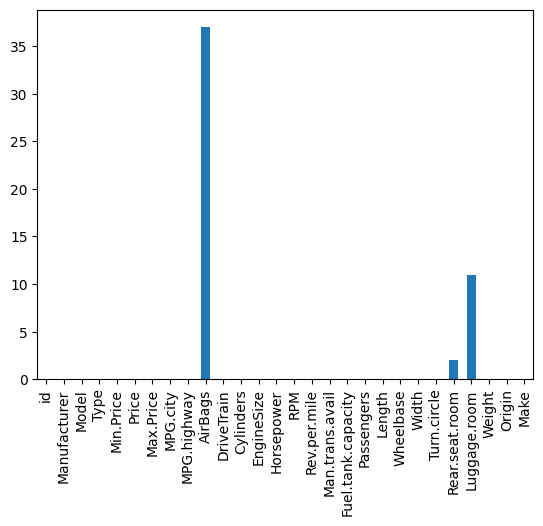

In [66]:
df.isna().sum().plot(kind="bar")

In [67]:
X=df.drop(labels=["Price"],axis=1)
Y=df[["Price"]]

In [68]:
cat=[]
num=[]
for i in X.columns:
    if df[i].dtypes==object:
        cat.append(i)
    else:
        num.append(i)    


In [69]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [70]:
cat_pipline=make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    
)

In [71]:
num_pipline=make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [72]:
pre = ColumnTransformer( [

    ("num",num_pipline,num),
    ("cat",cat_pipline,cat)
]

).set_output(transform="pandas")

In [73]:
pre.fit(xtrain,ytrain)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [74]:
Xtest_pre=pre.transform(xtest)

In [75]:
Xtrain_pre=pre.transform(xtrain)

In [76]:
Aplha=1.5

In [77]:
ytrain

,Price
65,19.1
15,16.3
68,16.3
78,11.1
30,7.4
...,...
20,15.8
60,14.9
71,14.4
14,15.9


In [79]:
mlflow.set_experiment("1st")
mlflow.set_tracking_uri("http://127.0.0.1:5000")
with mlflow.start_run():
    las=Lasso(alpha=Aplha)
    model=las.fit(Xtrain_pre,ytrain)

    predict_train=model.predict(Xtrain_pre)
    predict_test=model.predict(Xtest_pre)

     
    mae_train=mean_absolute_error(predict_train,ytrain) 
    mae_test=mean_absolute_error(predict_test,ytest) 


    accuracy_train=r2_score(predict_train,ytrain)
    accuracy_test=r2_score(predict_test,ytest)


    mlflow.log_metric("rscore_train",accuracy_train)
    mlflow.log_metric("rscore_test",accuracy_test)
    mlflow.log_metric("Mae_train",mae_train)
    mlflow.log_metric("Mae_test",mae_test)

    mlflow.log_param("alpha",Aplha)

    

2025/11/04 17:29:27 INFO mlflow.tracking.fluent: Experiment with name '1st' does not exist. Creating a new experiment.


KeyboardInterrupt: 